# GDP Analysis
We are working as the chief data scientist at NITI Aayog, reporting to the CEO. The CEO has initiated a project wherein the NITI Aayog will provide top-level recommendations to the Chief Ministers (CMs) of various states which will help them prioritize areas of development for their respective states. Since different states are in different phases of development, the recommendations should be specific to states as well.

The overall goal of this project is to help the CMs focus on areas which will foster economic development for their respective states. Since the most common measure of economic development is the GDP, you will analyse the GDP of the various states of India and suggest ways to improve it.

## Part-I: GDP Analysis of Indian States
For each of the following steps of analysis, choose an appropriate type of plot for comparing the data. Also, ensure that the plots are in increasing or decreasing order for better comparison. 

#### I-A Data
This data contains the GSDP-Current prices(in crores) for the duration 2011-2016 for all the states including the union territories. It also contains the (%Growth over previous year) for the duration 2012-2016 for all the states



In [1]:
#importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
#reading the csv file using pandas 'read_csv' funtion and specifying the encoding as 'utf-8' and further storing the file in the variable GSDP 
GSDP = pd.read_csv("GSDP_all_states.csv",encoding="utf-8")
#displaying the top five rows of of the GSDP dataframe 
GSDP.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [3]:
#checking the shape (no. of rows and no. of columns) of the dataset
GSDP.shape

(11, 36)

In [4]:
#counting the number of null values in the dataset GSDP
GSDP.isnull().sum()

Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal1                 11
Andaman 

In [5]:
# imputing the NAN values by 0 
GSDP.fillna(0)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,0.0,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,0.0,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,0.0,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,0.0,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,0.00,1153795.00,184091.00,0.0,0.00,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,0.00,0.00,0.00,290140.00,0.00,0.00,547396.00,...,654294.00,0.00,0.00,0.00,0.0,0.00,0.00,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,0.0,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,0.0,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,0.0,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,0.00,10.58,13.65,0.0,0.00,8.84,12.09,10.15,9.99


In [6]:
# using the drop funtion to drop the columns '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17
# 5 is the column number of '(% Growth over the previous year)' column
# 10 is the column number of 'GSDP - CURRENT PRICES (` in Crore)' column
# Specifying these two column numbers in the drop function
GSDP = GSDP.drop([5,10])
# displaying the updated dataframe after dropping two columns
GSDP


,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [7]:
# dropping the 'West Bengal1' column as this state contains "NA" values and setting the inplace value as TRUE
GSDP.drop(["West Bengal1"], axis = 1, inplace = True)
# subsetting the data frame and extrating the states only for the duration 2013-14, 2014-15 and 2015-16 on the row '(% Growth over previous year)'
df = GSDP.iloc[6:9,2:34]
# transposing the new dataframe and storing it in new variable
growth_over_previous_year = df.T
# adding a new column named 'mean' to the data frame 
# the mean is calculated over a period of three years for all the states
growth_over_previous_year['Mean'] = df.mean(axis=0)
# renaming the columns, in order to make it more readable
growth_over_previous_year.rename(columns={7:'2013-14',8:'2014-15',9:'2015-16'},inplace = True)
# printing the data frame
growth_over_previous_year

,2013-14,2014-15,2015-16,Mean
Andhra Pradesh,12.85,13.40,15.85,14.033333
Arunachal Pradesh,16.38,14.79,12.07,14.413333
Assam,13.31,11.45,13.19,12.650000
Bihar,12.30,17.92,10.59,13.603333
Chhattisgarh,16.44,13.69,10.98,13.703333
Goa,-5.77,13.12,10.75,6.033333
Gujarat,11.47,10.82,11.09,11.126667
Haryana,15.45,9.18,10.91,11.846667
Himachal Pradesh,14.42,10.14,NaN,12.280000
Jammu & Kashmir,10.09,4.70,17.91,10.900000


In [8]:
# resetting the index of the data frame 
mean_all_states= growth_over_previous_year.reset_index()
# renaming the new index column as 'States' and setting inplace = True
mean_all_states.rename(columns={'index':'States'},inplace=True)
# sorting the final result for easier interpretation
mean_all_states = mean_all_states.sort_values(['Mean'],ascending=False)
# printing the sorted dataset
mean_all_states

,States,2013-14,2014-15,2015-16,Mean
17,Mizoram,23.10,12.30,NaN,17.700000
25,Tripura,18.14,15.92,NaN,17.030000
18,Nagaland,21.98,10.85,NaN,16.415000
15,Manipur,17.83,11.39,NaN,14.610000
1,Arunachal Pradesh,16.38,14.79,12.07,14.413333
11,Karnataka,18.24,12.70,11.42,14.120000
0,Andhra Pradesh,12.85,13.40,15.85,14.033333
28,Andaman & Nicobar Islands,16.68,10.89,NaN,13.785000
4,Chhattisgarh,16.44,13.69,10.98,13.703333
3,Bihar,12.30,17.92,10.59,13.603333


In [9]:
Total = mean_all_states['Mean'].sum()
Total

397.0183333333333

Text(0, 0.5, 'Mean value')

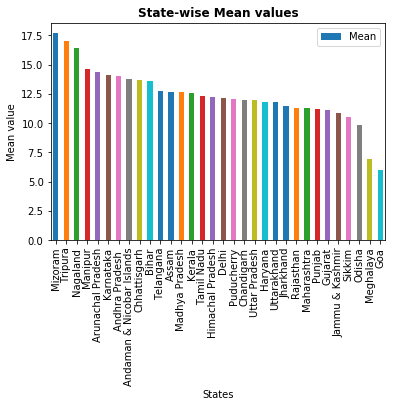

In [10]:
# plotting the mean against all the states using a bar plot
mean_all_states.plot.bar(x='States',y='Mean',stacked=True)

# setting the plot title 
plt.title('State-wise Mean values',fontweight='bold')
# setting x label of the plot
plt.xlabel('States')
# setting y label of the plot
plt.ylabel('Mean value')

In [11]:
# slicing the dataframe using iloc
# extracting the name of all states and the 'GSDP - CURRENT PRICES (` in Crore)' of all states for the duration 2015-16
Total_GDP = GSDP.iloc[4,2:34]
# resetting the index of the new data frame using 'reset_index()'
Total_GDP_1516 = Total_GDP.reset_index()
# renaming the index column as GDP and the 'GSDP - CURRENT PRICES (` in Crore)' for the year 2015-16 as GDP 
Total_GDP_1516.rename(columns={'index':'States',4:'GDP'},inplace=True)
# arranging the dataframe in descending order
Total_GDP_1516 = Total_GDP_1516.sort_values(['GDP'], ascending=[False])
# printing the dataframe
Total_GDP_1516

,States,GDP
23,Tamil Nadu,1.21267e+06
26,Uttar Pradesh,1.1538e+06
11,Karnataka,1.02707e+06
6,Gujarat,994316
0,Andhra Pradesh,609934
12,Kerala,588337
24,Telangana,575631
30,Delhi,551963
13,Madhya Pradesh,543975
7,Haryana,485184


Text(0.5, 1.0, 'Total GDP of states for 2015-16')

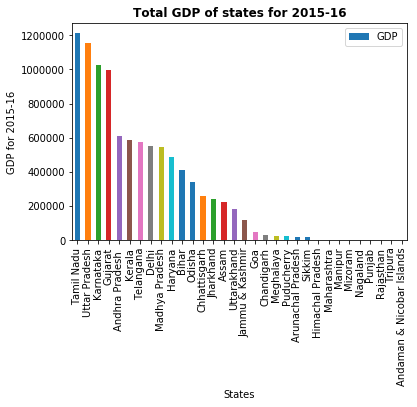

In [12]:
# plotting the GDP for all states for the duration 2015-16 using a bar plot 
Total_GDP_1516.plot.bar(x='States',y='GDP',stacked=True)
# setting the x label
plt.xlabel('States')
# setting y label
plt.ylabel('GDP for 2015-16')
# setting the title for the plot
plt.title('Total GDP of states for 2015-16',fontweight='bold')

In [13]:
# finding the top-5 states based on total GDP
Total_GDP_1516.head()

,States,GDP
23,Tamil Nadu,1.21267e+06
26,Uttar Pradesh,1.1538e+06
11,Karnataka,1.02707e+06
6,Gujarat,994316
0,Andhra Pradesh,609934


#### Data I-B
In this excercise we have separate dataset for each of the states. The CSV for each state consists of the distribution of GSDP among three sectors: the primary sector (agriculture), the secondary sector (industry), and the tertiary sector (services) along with taxes and subsidies. The three sectors are further sub categorised into sub-sub sectors. 

In [14]:
# loop for checking whether all CSV files have same number of rows 
# reading all the CSV files and using the encoding as 'cp1252'
# printing the number of rows in each CSV
def unique_identity(list_csv):
    for i in list_csv:
        df=pd.read_csv(i, encoding="cp1252")
        print(i)
        print(len(df['Item'].unique()))
        print("--"*10)

In [15]:
# giving he absolute path where all the CSV files are stored
path = r'./' # use your path
# using the glob function to find files recursively in the path , i have specified '*' in order to read all files with .csv extension 
reading_all_files = glob.glob(path + "*.csv")

#files = glob.glob('NAD-*.csv')
#files

In [16]:
# creating a for loop to strip the extra characters such as './/'
for i in range(len(reading_all_files)):
    reading_all_files[i] = reading_all_files[i].strip('.\\')

In [17]:
# Droppping the extra files which are not required for this excercise
# Further dropping the union territories like Delhi,Chandigarh and Puducherry
reading_all_files.remove('GSDP_all_states.csv')
reading_all_files.remove('Dropout_rates.csv')
reading_all_files.remove('NAD-Delhi-GSVA_cur_2016-17.csv')
reading_all_files.remove('NAD-Chandigarh-GSVA_cur_2015-16.csv')
reading_all_files.remove('NAD-Puducherry-GSVA_cur_2016-17.csv')

In [18]:
# calling the unique_identity function defined over head in order to print the number of rows in each CSV file
unique_identity(reading_all_files)

NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
33
--------------------
NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv
33
--------------------
NAD-Assam-GSVA_cur_2015-16.csv
33
--------------------
NAD-Bihar-GSVA_cur_2015-16.csv
33
--------------------
NAD-Chhattisgarh-GSVA_cur_2016-17.csv
33
--------------------
NAD-Goa-GSVA_cur_2015-16.csv
33
--------------------
NAD-Gujarat-GSVA_cur_2015-16.csv
33
--------------------
NAD-Haryana-GSVA_cur_2016-17.csv
33
--------------------
NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv
33
--------------------
NAD-Jharkhand-GSVA_cur_2015-16.csv
33
--------------------
NAD-Karnataka-GSVA_cur_2015-16.csv
33
--------------------
NAD-Kerala-GSVA_cur_2015-16.csv
33
--------------------
NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv
33
--------------------
NAD-Maharashtra-GSVA_cur_2014-15.csv
33
--------------------
NAD-Manipur-GSVA_cur_2014-15.csv
33
--------------------
NAD-Meghalaya-GSVA_cur_2016-17.csv
33
--------------------
NAD-Mizoram-GSVA_cur_2014-15.csv
33
-------------

In [19]:
# creating a new dataframe named as AP and reading the Andhra Pradesh csv file
AP = pd.read_csv('NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv',encoding="cp1252")
# creating a separate dataframe from the AP data frame and extracting only the 'S.No' and 'Item' column from it and storing it in the variable df_main
df_main=AP[['S.No.','Item']]
# displaying the top three rows of the dataframe
df_main.head(3)


,S.No.,Item
0,1,"Agriculture, forestry and fishing"
1,1.1,Crops
2,1.2,Livestock


In [20]:
# defining a new function named major_merger
# This function is first extracting the names of states from the CSV files and then merging the data for all states(except UT's)
# merging of the datasets is done using the merge()
# the merging is done only for the duration 2014-15 based on 'Item' column 
def major_merger(df_main, list_csv):
    for i in list_csv:
        
        s = i
        start = s.find('NAD-')+4
        end = s.find('-GSVA', start)
        # extracting the state names
        temp_suffix=s[start:end]
        # reading all the CSv files 
        df=pd.read_csv(i, encoding="cp1252")
        # merging the files on 'Item' column
        df_main=pd.merge(df_main, df[['Item','2014-15']], on='Item')
        # renaming the new column merged with the state-name
        df_main.rename(columns={'2014-15':str(temp_suffix)},inplace = True)
        
    df_main = df_main.drop([2],inplace=False)
    # returning the dataframe
    return df_main
        

In [21]:
# calling the major_merger function which contained one data frame with all files merged
df_major_merger = major_merger(df_main,reading_all_files)
# transposing the dataframe
df_major_merger = df_major_merger.T
df_major_merger

,0,1,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
S.No.,1,1.1,1.3,1.4,2,Total,3,4,5,Total,...,9,10,11,Total,12,13,14,15,16,17
Item,"Agriculture, forestry and fishing",Crops,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility...",Construction,Secondary,...,"Real estate, ownership of dwelling & professio...",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
Andhra_Pradesh,14819416,7893514,346160,2270664,1484300,16303716,4672266,1151729,4664889,10488884,...,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977
Arunachal_Pradesh,686117,415520,224017,8193,30842,716959,26120,113527,147842,287489,...,48418,243867,218728,631844,1636292,70099,30272,1676119,14870,112718
Assam,3855548,2890544,261987,529539,1471149,5326697,2002936,296587,1733568,4033091,...,1412466,1373611,1795658,9307109,18666897,1725309,582406,19809800,326780,60621
Bihar,7951890,4688237,550132,653224,68107,8019997,2189965,345168,3449763,5984896,...,3740641,2078171,4587589,22179969,36184863,3213546,2006421,37391988,1101240,33954
Chhattisgarh,3948847,2613371,597785,385483,2451970,6400817,4370593,1198438,2669855,8238886,...,2462166,867982,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860
Goa,308507,140421,15744,122201,3622,312129,1177608,204110,165819,1547536,...,407099,346486,180431,1738217,3597882,527279,61854,4063307,14950,271793
Gujarat,1.377e+07,9.67109e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,3.30235e+07,...,5.1795e+06,2.5762e+06,3.12341e+06,3.02204e+07,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263
Haryana,8.01524e+06,4.63673e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,1.25614e+07,...,6.97018e+06,1.03638e+06,2.00158e+06,1.92266e+07,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077


In [22]:
# slicing specific columns
# extracting the 'States' and the 'per capita GSDP' column
GSDP_Total = df_major_merger.iloc[2:,-1]
# resetting the index of the dataframe using 'reset_index()'
GSDP_per_capita = GSDP_Total.reset_index()
# rename the index column as 'States' and 'Per Capita GSDP (Rs.)' as 'GDP_per_Capita of all States'
GSDP_per_capita.rename(columns={'index':'States',29:'GDP_per_Capita of all States'},inplace=True)
# sorting the values based on 'GDP_per_capita of all States'
GSDP_per_capita = GSDP_per_capita.sort_values('GDP_per_Capita of all States',ascending=False)
# printing the dataframe
GSDP_per_capita

,States,GDP_per_Capita of all States
5,Goa,271793
21,Sikkim,240274
7,Haryana,164077
11,Kerala,154778
25,Uttarakhand,153076
13,Maharashtra,152853
8,Himachal_Pradesh,147330
22,Tamil_Nadu,146503
10,Karnataka,145141
6,Gujarat,141263


Text(0, 0.5, 'GDP per capita of all states')

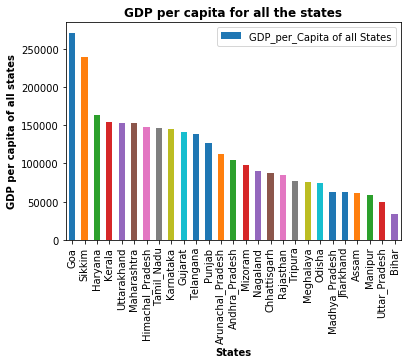

In [23]:
# arrange in ascending and descening order and do the analysis
GSDP_per_capita.plot.bar(x='States',y='GDP_per_Capita of all States',stacked=True)
# plot title
plt.title('GDP per capita for all the states',fontweight='bold')
# setting xlabel of plot
plt.xlabel('States',fontweight='bold')
# setting ylabel of plot
plt.ylabel('GDP per capita of all states',fontweight='bold')

In [24]:
# top-5 states based on GDP per capita
GSDP_per_capita.head()

,States,GDP_per_Capita of all States
5,Goa,271793
21,Sikkim,240274
7,Haryana,164077
11,Kerala,154778
25,Uttarakhand,153076


In [25]:
# bottom-5 states based on GDP per capita
GSDP_per_capita.tail()

,States,GDP_per_Capita of all States
9,Jharkhand,62091
2,Assam,60621
14,Manipur,58442
26,Uttar_Pradesh,49450
3,Bihar,33954


In [26]:
# ratio of highest per capita GDP to the lowest per capita GDP
ratio_max_min = max(GSDP_per_capita['GDP_per_Capita of all States'])/min(GSDP_per_capita['GDP_per_Capita of all States'])
ratio_max_min

8.004741709371503

In [27]:
# slicing the dataframe and extracting all the states(starting from 2 row) and the primary sector contribution(which is the 5th column)  
Total_primary_sector = df_major_merger.iloc[2:,5]
# resetting the index of data frame
primary = Total_primary_sector.reset_index()
# renaming the index column as 'States' and 6th column as 'Primary Sector Contribution'
primary.rename(columns={'index':'States',6:'Primary Sector Contribution'},inplace=True)
# printing the dataframe
primary

,States,Primary Sector Contribution
0,Andhra_Pradesh,16303716
1,Arunachal_Pradesh,716959
2,Assam,5326697
3,Bihar,8019997
4,Chhattisgarh,6400817
5,Goa,312129
6,Gujarat,1.58872e+07
7,Haryana,8.04042e+06
8,Himachal_Pradesh,1548366
9,Jharkhand,5248354


In [28]:
# slicing the dataframe and extracting all the states(starting from 2 row) and the primary sector contribution(which is the 9th column)  
Total_secondary_sector = df_major_merger.iloc[2:,9]
# resetting the index of data frame
secondary = Total_secondary_sector.reset_index()
# renaming the index column as 'States' and 9th column as 'Secondary Sector Contribution'
secondary.rename(columns={'index':'States',10:'Secondary Sector Contribution'},inplace=True)
# printing the dataframe
secondary

,States,Secondary Sector Contribution
0,Andhra_Pradesh,10488884
1,Arunachal_Pradesh,287489
2,Assam,4033091
3,Bihar,5984896
4,Chhattisgarh,8238886
5,Goa,1547536
6,Gujarat,3.30235e+07
7,Haryana,1.25614e+07
8,Himachal_Pradesh,4119162
9,Jharkhand,6241471


In [29]:
# slicing the dataframe and extracting all the states(starting from 2 row) and the primary sector contribution(which is the 22nd column)  
Total_tertiary_sector = df_major_merger.iloc[2:,22]
# resetting the index of data frame 
tertiary = Total_tertiary_sector.reset_index()
# renaming the index column as 'States' and 22nd column as 'Secondary Sector Contribution'
tertiary.rename(columns={'index':'States',23:'Tertiary Sector Contribution'},inplace=True)
# printing the dataframe
tertiary

,States,Tertiary Sector Contribution
0,Andhra_Pradesh,22032942
1,Arunachal_Pradesh,631844
2,Assam,9307109
3,Bihar,22179969
4,Chhattisgarh,7588778
5,Goa,1738217
6,Gujarat,3.02204e+07
7,Haryana,1.92266e+07
8,Himachal_Pradesh,4133326
9,Jharkhand,8133341


In [30]:
# extracting the GDP of all states from the merged data frame
GDP_Total = df_major_merger.iloc[2:,26]
GDP_all_states = GDP_Total.reset_index()
GDP_all_states.rename(columns={'index':'States',27:'GDP for all states'},inplace=True)
GDP_all_states

,States,GDP for all states
0,Andhra_Pradesh,52646842
1,Arunachal_Pradesh,1676119
2,Assam,19809800
3,Bihar,37391988
4,Chhattisgarh,23498180
5,Goa,4063307
6,Gujarat,8.95027e+07
7,Haryana,4.37462e+07
8,Himachal_Pradesh,10436879
9,Jharkhand,21710718


In [31]:
# selecting the contribution of primary,secondary and tertiary sector and storing in separate variables(extracting only the numerical value column)
prim_contri = primary[primary.columns[1]]
sec_contri = secondary[secondary.columns[1]]
tert_contri = tertiary[tertiary.columns[1]]
# selecting the GDP of all states (extracting only the numerical value column)
per_contri = GDP_all_states[GDP_all_states.columns[1]]

# finding the percentatge of each states primary contribution with total GDP of all states
percent_primary = ((prim_contri/per_contri)*100)
per_primary = percent_primary.reset_index()
per_primary.rename(columns={'index':1,0:'Primary Percentage'},inplace=True)

# finding the percentatge of each states secondary contribution with total GDP of all states
percent_secondary = ((sec_contri/per_contri)*100)
per_secondary = percent_secondary.reset_index()
per_secondary.rename(columns={'index':2,0:'Secondary Percentage'},inplace=True)

# finding the percentatge of each states tertiary contribution with total GDP of all states
percent_tertiary = ((tert_contri/per_contri)*100)
per_tertiary = percent_tertiary.reset_index()
per_tertiary.rename(columns={'index':3,0:'Tertiary Percentage'},inplace=True)

merge_all_percentage = GDP_all_states.join(per_primary)
merge_all_percentage = merge_all_percentage.join(per_secondary)
merge_all_percentage = merge_all_percentage.join(per_tertiary)

# dropping the unnecessary columns
merge_all_percentage = merge_all_percentage.drop([1,2,3], axis=1)
# setting the column 'GDP for all states' type as float
merge_all_percentage['GDP for all states'] = merge_all_percentage['GDP for all states'].astype('float64')
# printing the dataframe
merge_all_percentage

,States,GDP for all states,Primary Percentage,Secondary Percentage,Tertiary Percentage
0,Andhra_Pradesh,52646842.0,30.9681,19.9231,41.8505
1,Arunachal_Pradesh,1676119.0,42.7749,17.1521,37.6968
2,Assam,19809800.0,26.8892,20.3591,46.9823
3,Bihar,37391988.0,21.4484,16.0058,59.3174
4,Chhattisgarh,23498180.0,27.2396,35.0618,32.2952
5,Goa,4063307.0,7.68165,38.0856,42.7784
6,Gujarat,89502727.0,17.7505,36.8967,33.7648
7,Haryana,43746207.0,18.3797,28.7143,43.9503
8,Himachal_Pradesh,10436879.0,14.8355,39.4674,39.6031
9,Jharkhand,21710718.0,24.174,28.7483,37.4623


Text(0, 0.5, 'Sectors')

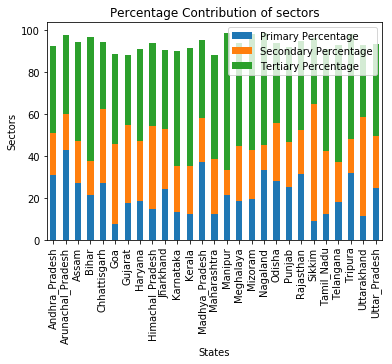

In [32]:
# plotting a stacked bar graph form percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states
merge_all_percentage.plot.bar(x='States',y=["Primary Percentage", "Secondary Percentage", "Tertiary Percentage"],stacked=True)
# title for plot
plt.title('Percentage Contribution of sectors')
# x-label for plot
plt.xlabel('States')
# y-label for plot
plt.ylabel('Sectors')

In [33]:
# subsetting the dataframe
category = df_major_merger.iloc[2:,-1]
# Categorizing the states into categories (C1, C2, C3, C4 - C1 would have the highest per capita GDP, C4 the lowest) based on GDP per capita
category['quantile'] = pd.qcut(category, q=[0.0,0.20,0.5, 0.85, 1.0], labels=['C4', 'C3', 'C2', 'C1'])

In [34]:
# converting a series into a dataframe
category_GDP = pd.DataFrame(category)
category_GDP['quantile'] = category['quantile']
# sorting values based on quantiles
category_GDP = category_GDP.sort_values(['quantile'],ascending=False)
# dropping the null values
category_GDP.dropna(inplace=True)
# printing the data frame
category_GDP

,29,quantile
Kerala,154778,C1
Sikkim,240274,C1
Goa,271793,C1
Haryana,164077,C1
Maharashtra,152853,C2
Uttarakhand,153076,C2
Arunachal_Pradesh,112718,C2
Telangana,139035,C2
Tamil_Nadu,146503,C2
Punjab,126606,C2


In [35]:
# Storing the list in a new variable based in the column of the dataframe which is equal to the category desired 
C1=list(category_GDP[category_GDP['quantile']=='C1'].index)
C2=list(category_GDP[category_GDP['quantile']=='C2'].index)
C3=list(category_GDP[category_GDP['quantile']=='C3'].index)
C4=list(category_GDP[category_GDP['quantile']=='C4'].index)

In [36]:
# creating a new dataframe for quantiles
df_category = major_merger(df_main,reading_all_files)

In [37]:
# summing the quantile values over the categories 
df_category['C1']=df_category.loc[:,C1].sum(axis=1)
df_category.drop(C1,inplace=True, axis=1)
df_category['C2']=df_category.loc[:,C2].sum(axis=1)
df_category.drop(C2,inplace=True, axis=1)
df_category['C3']=df_category.loc[:,C3].sum(axis=1)
df_category.drop(C3,inplace=True, axis=1)
df_category['C4']=df_category.loc[:,C4].sum(axis=1)
df_category.drop(C4,inplace=True, axis=1)

In [38]:
# Removing the rows which are not required like 'Primary','Secondary','Tertiary'
df_category = df_category[df_category.Item != 'Primary' ]
df_category = df_category[df_category.Item != 'Secondary'] 
df_category = df_category[df_category.Item != 'Tertiary']

In [39]:
# Dropping the sub-sub categoies as they do not contribute to the total percentage as per the question required    
df_category = df_category.drop(df_category.index[[1,2,3,9,11,12,13,14,15,20,21,22,23,24,25]])
df_category

,S.No.,Item,C1,C2,C3,C4
0,1,"Agriculture, forestry and fishing",14391809.0,75209022.0,42226888.0,56735044.0
5,2,Mining and quarrying,588961.0,10373346.0,10835771.0,6096419.0
7,3,Manufacturing,13758793.0,109196530.0,22038331.0,24987032.0
8,4,"Electricity, gas, water supply & other utility...",2000998.0,13823378.0,4604774.0,4310264.0
9,5,Construction,11264451.0,40653562.0,15707921.0,22775948.0
11,6,"Trade, repair, hotels and restaurants",13995159.0,61238862.0,17245309.0,27484595.0
13,7,"Transport, storage, communication & services r...",6818560.0,33749808.0,12231484.0,16191800.0
19,8,Financial services,3936489.0,36296642.0,5766226.0,7684498.0
20,9,"Real estate, ownership of dwelling & professio...",14740245.0,92121446.0,16224118.0,24177534.0
21,10,Public administration,3571292.0,18567815.0,7927173.0,13486630.0


In [40]:
# Selecting only the 'Item' column from the dataframe 
df_80_category = df_category.iloc[:,1]
new_df_Item=pd.DataFrame(df_80_category)
new_df_Item

,Item
0,"Agriculture, forestry and fishing"
5,Mining and quarrying
7,Manufacturing
8,"Electricity, gas, water supply & other utility..."
9,Construction
11,"Trade, repair, hotels and restaurants"
13,"Transport, storage, communication & services r..."
19,Financial services
20,"Real estate, ownership of dwelling & professio..."
21,Public administration


In [41]:
# Calculating the percentage of category C1 by dividing with total GDP of C1 * 100
sum_C1 = (df_category['C1']/101930677.0)*100
# converting the series to a dataframe
new_df_sum_C1 = pd.DataFrame(sum_C1)
new_df_sum_C1.sort_values('C1',ascending=False)
new_df_Item_C1 = new_df_Item.join(new_df_sum_C1)
new_df_Item_C1.sort_values('C1',ascending=False)

,Item,C1
20,"Real estate, ownership of dwelling & professio...",14.461049
0,"Agriculture, forestry and fishing",14.119213
11,"Trade, repair, hotels and restaurants",13.730076
7,Manufacturing,13.498187
9,Construction,11.051090
22,Other services,7.907258
13,"Transport, storage, communication & services r...",6.689409
19,Financial services,3.861928
21,Public administration,3.503648
8,"Electricity, gas, water supply & other utility...",1.963097


In [42]:
# Calculating the percentage of category C2 by dividing with total GDP of C2 * 100
sum_C2 = (df_category['C2']/586380500.0)*100
new_df_sum_C2 = pd.DataFrame(sum_C2)
new_df_sum_C2.sort_values('C2',ascending=False)
new_df_Item_C2 = new_df_Item.join(new_df_sum_C2)
new_df_Item_C2.sort_values('C2',ascending=False)

,Item,C2
7,Manufacturing,18.622128
20,"Real estate, ownership of dwelling & professio...",15.710182
0,"Agriculture, forestry and fishing",12.825976
11,"Trade, repair, hotels and restaurants",10.443537
9,Construction,6.932966
19,Financial services,6.189947
22,Other services,6.182616
13,"Transport, storage, communication & services r...",5.755616
21,Public administration,3.166513
8,"Electricity, gas, water supply & other utility...",2.357408


In [43]:
# Calculating the percentage of category C3 by dividing with total GDP of C3 * 100
sum_C3 = (df_category['C3']/177966387.0)*100
new_df_sum_C3 = pd.DataFrame(sum_C3)
new_df_sum_C3.sort_values('C3',ascending=False)
new_df_Item_C3 = new_df_Item.join(new_df_sum_C3)
new_df_Item_C3.sort_values('C3',ascending=False)

,Item,C3
0,"Agriculture, forestry and fishing",23.727451
7,Manufacturing,12.383423
11,"Trade, repair, hotels and restaurants",9.690206
20,"Real estate, ownership of dwelling & professio...",9.116395
9,Construction,8.826341
22,Other services,7.201032
13,"Transport, storage, communication & services r...",6.872918
5,Mining and quarrying,6.088662
21,Public administration,4.454309
19,Financial services,3.240065


In [44]:
# Calculating the percentage of category C4 by dividing with total GDP of C4 * 100
sum_C4 = (df_category['C4']/233252066.0)*100
new_df_sum_C4 = pd.DataFrame(sum_C4)
new_df_sum_C4.sort_values('C4',ascending=False)
new_df_Item_C4 = new_df_Item.join(new_df_sum_C4)
new_df_Item_C4.sort_values('C4',ascending=False)


,Item,C4
0,"Agriculture, forestry and fishing",24.323490
11,"Trade, repair, hotels and restaurants",11.783216
7,Manufacturing,10.712459
20,"Real estate, ownership of dwelling & professio...",10.365410
9,Construction,9.764521
13,"Transport, storage, communication & services r...",6.941761
22,Other services,6.799089
21,Public administration,5.781998
19,Financial services,3.294504
5,Mining and quarrying,2.613661


In [45]:
# creating a data frame by merging all the sum of each category along with the 'Item' column 
new_df_Item = new_df_Item.join(new_df_sum_C1)
new_df_Item = new_df_Item.join(new_df_sum_C2)
new_df_Item = new_df_Item.join(new_df_sum_C3)
new_df_Item = new_df_Item.join(new_df_sum_C4)
new_df_Item.rename(columns={'Item':'Sub-sectors','C1':'%contribution of C1 category states',
                            'C2':'%contribution of C2 category states',
                            'C3':'%contribution of C3 category states',
                            'C4':'%contribution of C4 category states'},inplace=True)
new_df_Item

,Sub-sectors,%contribution of C1 category states,%contribution of C2 category states,%contribution of C3 category states,%contribution of C4 category states
0,"Agriculture, forestry and fishing",14.119213,12.825976,23.727451,24.323490
5,Mining and quarrying,0.577805,1.769047,6.088662,2.613661
7,Manufacturing,13.498187,18.622128,12.383423,10.712459
8,"Electricity, gas, water supply & other utility...",1.963097,2.357408,2.587440,1.847900
9,Construction,11.051090,6.932966,8.826341,9.764521
11,"Trade, repair, hotels and restaurants",13.730076,10.443537,9.690206,11.783216
13,"Transport, storage, communication & services r...",6.689409,5.755616,6.872918,6.941761
19,Financial services,3.861928,6.189947,3.240065,3.294504
20,"Real estate, ownership of dwelling & professio...",14.461049,15.710182,9.116395,10.365410
21,Public administration,3.503648,3.166513,4.454309,5.781998


Text(0.5, 1.0, 'Contribution of the sub-sectors as a percentage of the GSDP of each category')

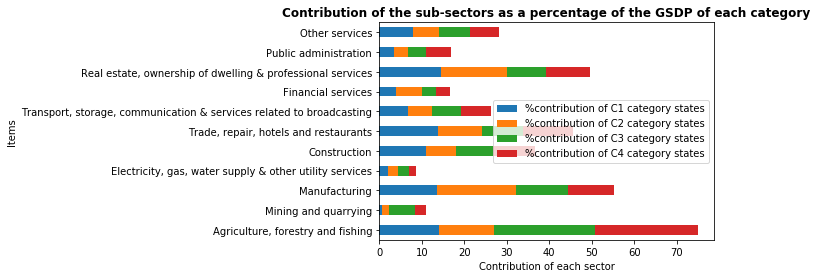

In [46]:
# using a stacked bar plot (horizontal) to display the percentage contribution n each categry towards the various sectors
new_df_Item.plot.barh(x='Sub-sectors',y=['%contribution of C1 category states','%contribution of C2 category states','%contribution of C3 category states','%contribution of C4 category states'],stacked=True)
plt.xlabel('Contribution of each sector')
plt.ylabel('Items')
plt.title('Contribution of the sub-sectors as a percentage of the GSDP of each category',fontweight="bold")

# Data-II 
This section will require the drop-out rate dataset apart from the dataset that have been used in Part-1 of the case study.  We need to analyze if there exists a correlation between the GDP per capita w.r.t the dropout rates in education

In [47]:
# Storing the GSDP_per_capita value (used previously) into a new variable 
GSDP_1b = GSDP_per_capita
GSDP_1b.head(2)

,States,GDP_per_Capita of all States
5,Goa,271793
21,Sikkim,240274


In [48]:
# Changing the names of the columns so that the names can be matched with the drop-out rates csv file
GSDP_sub_sector = GSDP_1b['States'].replace({'Andhra_Pradesh':'Andhra Pradesh','Arunachal_Pradesh':'Arunachal Pradesh',
                                                'Himachal_Pradesh':'Himachal Pradesh','Madhya_Pradesh':'Madhya Pradesh',
                                                'Tamil_Nadu':'Tamil Nadu','Uttar_Pradesh':'Uttar Pradesh','Chhattisgarh':'Chhatisgarh','Uttarakhand':'Uttrakhand'})

In [49]:
# selecting the GDP_per_capita column
per_capita = GSDP_per_capita.iloc[:,1]
per_capita = pd.DataFrame(per_capita)
per_capita

,GDP_per_Capita of all States
5,271793
21,240274
7,164077
11,154778
25,153076
13,152853
8,147330
22,146503
10,145141
6,141263


In [50]:
# joining all the columns to merge into a single dataframe
GDP_per_capita_1b = pd.DataFrame(GSDP_sub_sector)
GDP_per_capita_1b = GDP_per_capita_1b.join(per_capita)
GDP_per_capita_1b

,States,GDP_per_Capita of all States
5,Goa,271793
21,Sikkim,240274
7,Haryana,164077
11,Kerala,154778
25,Uttrakhand,153076
13,Maharashtra,152853
8,Himachal Pradesh,147330
22,Tamil Nadu,146503
10,Karnataka,145141
6,Gujarat,141263


In [51]:
# reading the drop-out CSV 
drop_out = pd.read_csv("Dropout_rates.csv",encoding="utf-8")
# Extracting only the columns for the drop-out rates in education for 'Primary','Upper-Primary','Secondary'
drop_out_modified = drop_out.iloc[:,[1,3,7,10]]
# Renaming the columns , so its easy to understand
drop_out_modified = drop_out_modified.rename(columns={'Level of Education - State':'States','Primary - 2014-2015':'Primary',
                                                     'Upper Primary - 2014-2015':'Upper_Pimary',
                                                     'Secondary - 2014-2015':'Secondary'})
# merging the new data frame of data-II with the data extracted from data-I
drop_out_modified = pd.merge(drop_out_modified,GDP_per_capita_1b , on='States')
# converting the 'GDP_per_capita of all states' column to float to match the datatype of other columns
drop_out_modified['GDP_per_Capita of all States'] = drop_out_modified['GDP_per_Capita of all States'].astype('float64')
drop_out_modified

,States,Primary,Upper_Pimary,Secondary,GDP_per_Capita of all States
0,Andhra Pradesh,4.35,5.20,15.71,104977.0
1,Arunachal Pradesh,10.89,6.71,17.11,112718.0
2,Assam,7.44,10.51,27.06,60621.0
3,Bihar,2.09,4.08,25.90,33954.0
4,Chhatisgarh,1.42,5.85,21.26,86860.0
5,Goa,0.20,0.07,11.15,271793.0
6,Gujarat,0.76,6.41,25.04,141263.0
7,Haryana,0.41,5.81,15.89,164077.0
8,Himachal Pradesh,0.46,0.87,6.07,147330.0
9,Jharkhand,6.41,8.99,24.00,62091.0


In [52]:
# Correlation matrix
corr_pri = drop_out_modified.corr()

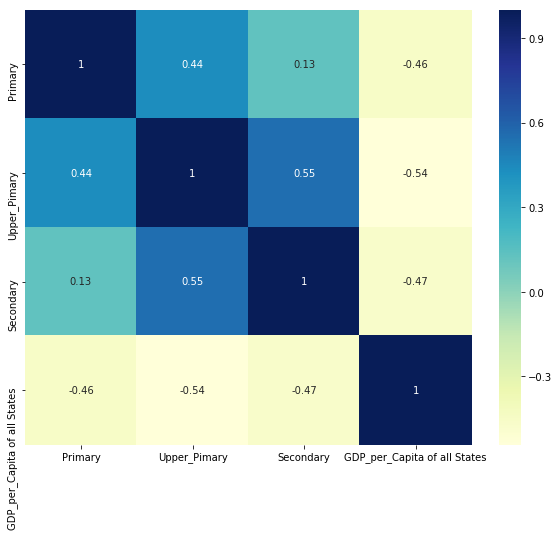

In [53]:
# Heatmap
plt.figure(figsize=(10,8))

sns.heatmap(corr_pri, cmap="YlGnBu", annot=True)
plt.show()

C:\Users\Yuthika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


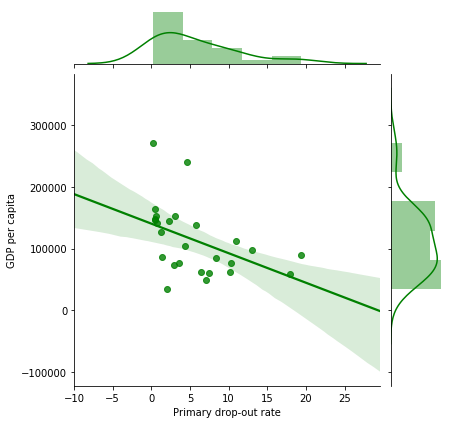

In [54]:
# using joinplot to find the correlation between the two columns
sns.jointplot(data=drop_out_modified,x=drop_out_modified['Primary'],
              y=drop_out_modified['GDP_per_Capita of all States'],kind='reg',color='g')
plt.xlabel('Primary drop-out rate')
plt.ylabel('GDP per capita')
plt.show()

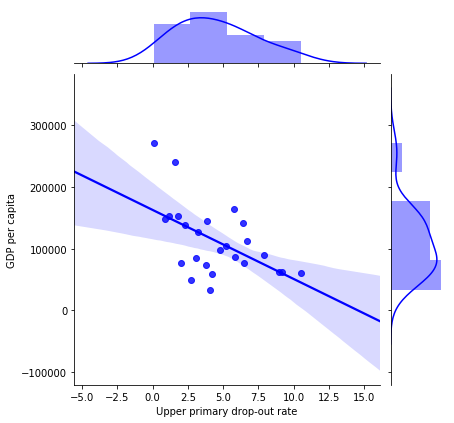

In [55]:
# using joinplot to find the correlation between the two columns
sns.jointplot(data=drop_out_modified,x=drop_out_modified['Upper_Pimary'],
              y=drop_out_modified['GDP_per_Capita of all States'],kind='reg',color='b')
plt.xlabel('Upper primary drop-out rate')
plt.ylabel('GDP per capita')
plt.show()

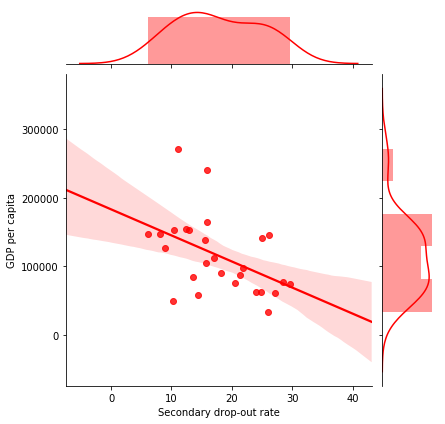

In [56]:
# using joinplot to find the correlation between the two columns
sns.jointplot(data=drop_out_modified,x=drop_out_modified['Secondary'],
              y=drop_out_modified['GDP_per_Capita of all States'],kind='reg',color='r')
plt.xlabel('Secondary drop-out rate')
plt.ylabel('GDP per capita')
plt.show()